# Linear Regression Exercise `R`

This exercise is going to be a little different in the sense that we won't be guiding in a question-by-question format. Instead, we are going to let you construct a linear model in your choice of `R` or `Python`, whichever you prefer.

The prediction problem is to predict `height` from the `'/dsa/data/all_datasets/stature-hand-foot/stature-hand-foot.csv'` dataset. You can use any variable or combination of variables in order to predict `height`.

You are not going to be graded upon the performance of the model itself, but please approach this as an actual prediction problem. That being said, you should split the data into training and testing sets, in which your model is trained on your training set while the performance is assessed on the testing set. Be sure to predict some output with your testing inputs.

The purpose of this assignment is to demonstrate your ability to use regression to develop a machine learning model. Feel free to include anything that demonstrates your understanding of model development and model refinement including data exploration and even a written description of your reasoning. 

Like always, feel free to ask questions along the way if you get stuck at any point. We are more than happy to help!

To add execution cells, click in this cell.
Then, in the notebook menu: `Insert > Insert Cell Below`

In [38]:
library(dplyr)
library(caret)
library(ggplot2)

data = read.csv('/dsa/data/all_datasets/stature-hand-foot/stature-hand-foot.csv')

data$gender = as.character(data$gender)


In [39]:
nums = sapply(data, is.numeric)
cor(data[ , nums])

,height,hand.length,foot.length
height,1.0000000,0.8732954,0.8812795
hand.length,0.8732954,1.0000000,0.7882243
foot.length,0.8812795,0.7882243,1.0000000


In [40]:
frmla = height ~ foot.length

In [41]:
m1 = train(frmla, data, method = "lm")
summary(m1)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-114.270  -22.007   -4.401   17.094  229.729 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 566.0328    48.3199   11.71   <2e-16 ***
foot.length   4.4620     0.1934   23.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.53 on 153 degrees of freedom
Multiple R-squared:  0.7767,	Adjusted R-squared:  0.7752 
F-statistic:   532 on 1 and 153 DF,  p-value: < 2.2e-16


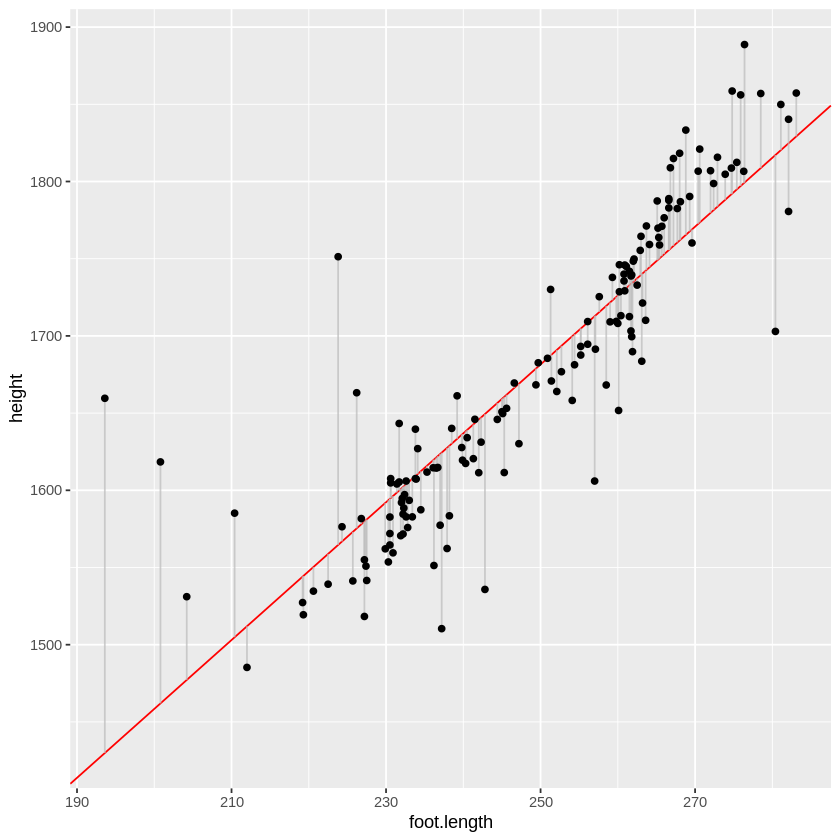

In [42]:
intcpt = coef(m1$finalModel)[1]
slp = coef(m1$finalModel)[2]

ggplot(data, aes(x = foot.length, y = height))  + 
    geom_abline(intercept = intcpt, slope = slp, colour = "red")+
    geom_segment(aes(x=foot.length, xend=foot.length, y=height, yend=fitted.values(m1)), colour = "grey", alpha = .75) +
    geom_point()

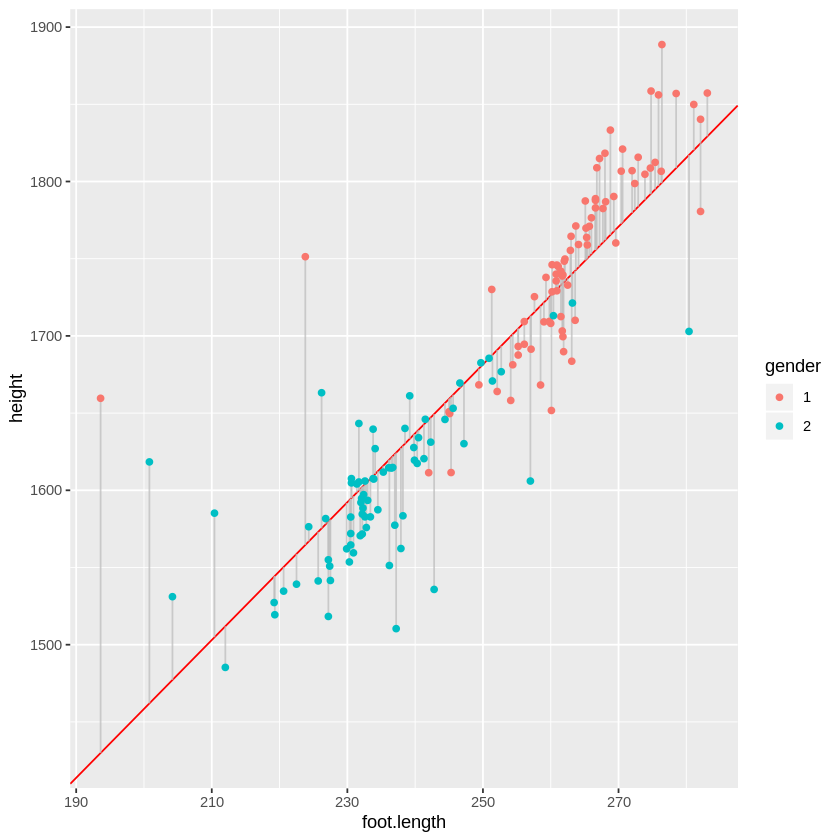

In [43]:
ggplot(data, aes(x = foot.length, y = height, colour = gender))  + 
    geom_abline(intercept = intcpt, slope = slp, colour = "red")+
    geom_segment(aes(x=foot.length, xend=foot.length, y=height, yend=fitted.values(m1)), colour = "grey", alpha = .75) +
    geom_point()

In [44]:
frmla2 = height ~ foot.length + gender
m2 = train(frmla2, data, method = "lm")
summary(m2)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-97.055 -26.147   1.318  19.285 130.125 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 908.7493    68.7143  13.225  < 2e-16 ***
foot.length   3.2062     0.2612  12.277  < 2e-16 ***
gender2     -61.8123     9.6623  -6.397 1.85e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.65 on 152 degrees of freedom
Multiple R-squared:  0.824,	Adjusted R-squared:  0.8217 
F-statistic: 355.9 on 2 and 152 DF,  p-value: < 2.2e-16


In [54]:
coef.icept = coef(m2$finalModel)[1]
coef.slope = coef(m2$finalModel)[2]
gender_coefs <- coef(m2$finalModel)[2:3]
data$pred<-predict(m2, newdata=data)

In [55]:
paste("intercept:", coef.icept)
paste("slope:", coef.slope)
gender_coefs

[1] "intercept: 908.749277356465"

[1] "slope: 3.2062299893586"

foot.length     gender2 
    3.20623   -61.81230

In [56]:
head(cbind(fitted.values(m2), data$pred))

X1,1773.149,1773.149
X2,1714.475,1714.475
X3,1529.475,1529.475
X4,1626.304,1626.304
X5,1813.227,1813.227
X6,1768.019,1768.019


In [57]:
foot.length <- 250 
gender <- "1" 
predict(m2,newdata= as.data.frame(cbind(as.numeric(foot.length),gender)))

1 
1710.307

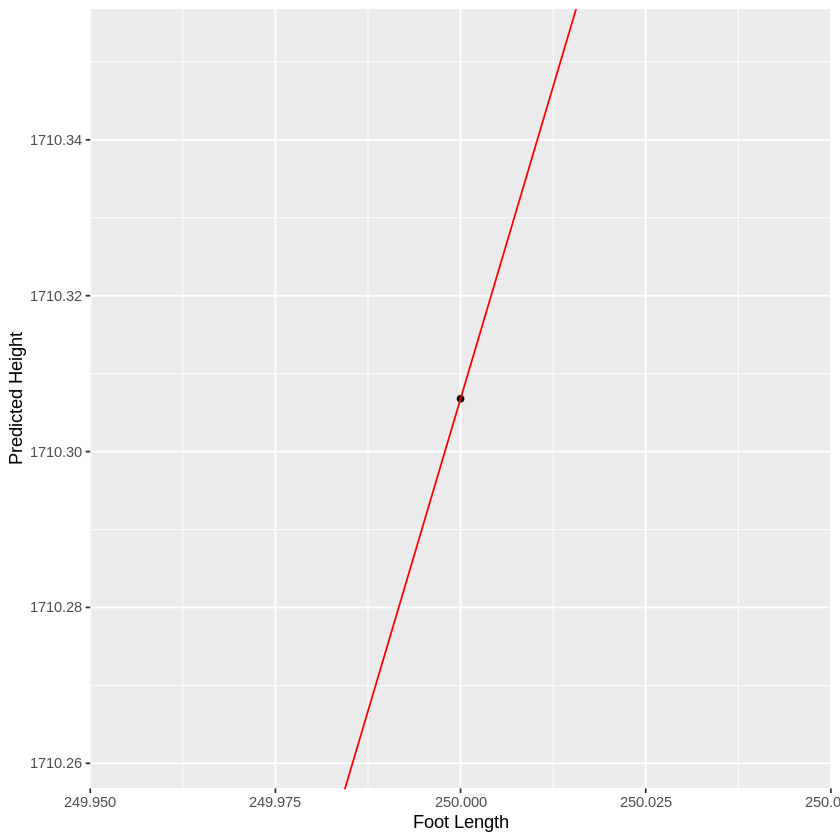

In [58]:
qplot(x = foot.length, y = predict(m2,newdata= as.data.frame(cbind(as.numeric(foot.length),gender))) ) + 
geom_abline(intercept = coef.icept, slope = coef.slope, colour = "red" ) + labs(x = "Foot Length",y = "Predicted Height")

In [59]:
genders <- data %>% 
group_by(gender) %>%
summarize()

coef <-cbind(genders, gender_coefs)

coef

,gender,gender_coefs
,<chr>,<dbl>
foot.length,1,3.20623
gender2,2,-61.81230


In [60]:
mod <- mutate(coef, gender_coefs = replace(gender_coefs, gender_coefs == coef.slope, 0))
mod

gender,gender_coefs
<chr>,<dbl>
1,0.0000
2,-61.8123


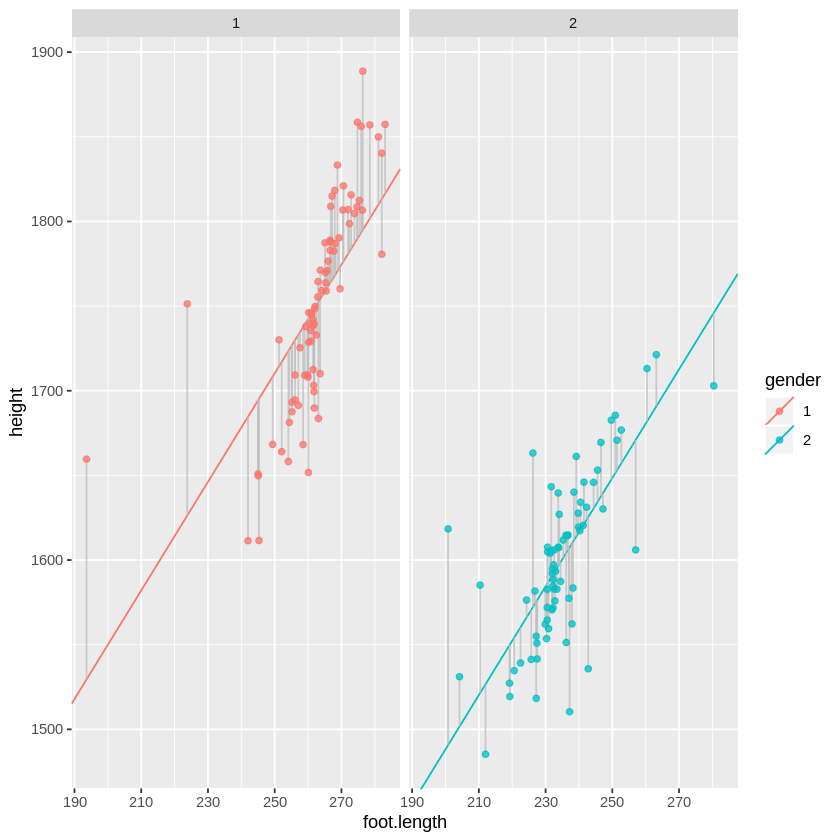

In [61]:
p<-ggplot(data = data, aes(foot.length,height))  + facet_wrap(~ gender)

p + geom_abline(aes(slope = coef.slope, intercept = coef.icept+gender_coefs, colour = gender),mod ) +
geom_segment(aes(x=foot.length, xend=foot.length, y=height, yend=pred), colour = "grey", alpha = .75) + 
geom_point(aes(colour = gender), alpha = .75)

# Save your notebook, then `File > Close and Halt`